# Cluster of Environmental Justice Populations in Oahu (2019)

In [10]:
#%cd C:\Users\zak\1python_code

In [11]:
#cluster
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [12]:
import geopandas as gpd
df=gpd.read_file("data_file.geojson")
features = df[['pov', 'y65', 'y1017', 'zveh', 'dis', 'min', 'lep']]

C:\Users\zmumuni\python\Anaconda3\lib\site-packages\geopandas\plotting.py:630: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  warnings.warn(
C:\Users\zmumuni\python\Anaconda3\lib\site-packages\geopandas\plotting.py:637: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  warnings.warn(
C:\Users\zmumuni\python\Anaconda3\lib\site-packages\geopandas\plotting.py:630: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  warnings.warn(
C:\Users\zmumuni\python\Anaconda3\lib\site-packages\geopandas\plotting.py:637: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  warnings.warn(
C:\Users\zmumuni\python\Anaconda3\lib\site-packages\geopandas\plotting.py:630: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  warnings.warn(
C:\Users\zmumuni\python\Anaconda3\l

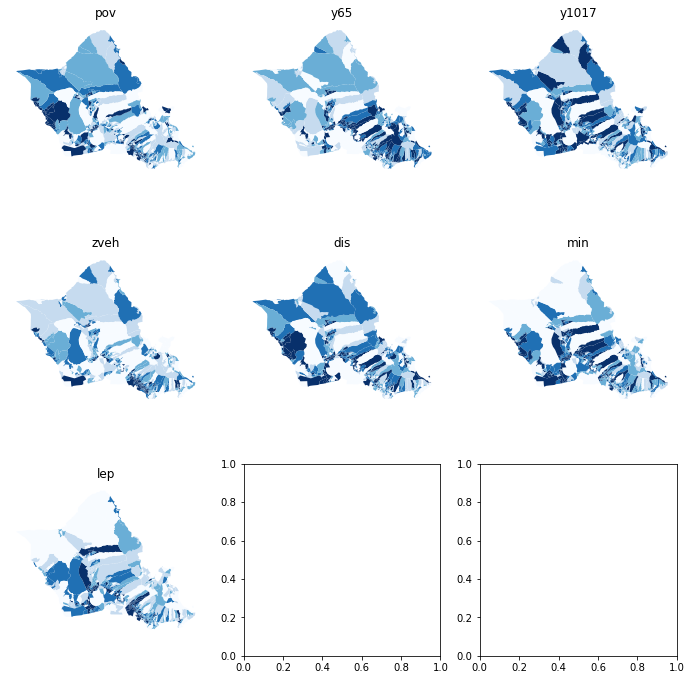

In [13]:
import mapclassify
# Create figure and axes
f, axs = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))
# Make the axes accessible with single indexing
axs = axs.flatten()
# Start the loop over all the variables of interest
for i, col in enumerate(features):
    # select the axis where the map will go
    ax = axs[i]
    # Plot the map
    df.plot(column=col, axes=ax, scheme='Quantiles', linewidth=0, colormap='Blues')
    # Remove axis clutter
    ax.set_axis_off()
    # Set the axis title to the name of variable being plotted
    ax.set_title(col)
# Display the figure
plt.show()

In [14]:
# transform variables
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

C:\Users\zmumuni\python\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


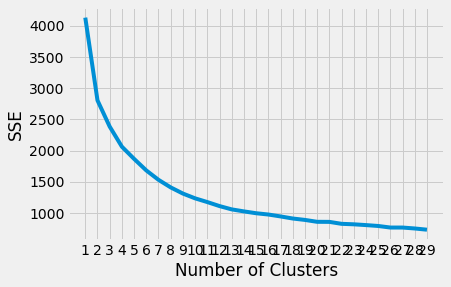

In [15]:
#hyper-parameter tuning to determine the best number of clusters
kmeans_kwargs = {
    "init": "random",
    "n_init": 30,
    "max_iter": 300,
    "random_state": 42,
}
   
# A list holds the SSE values for each k
sse = []
for k in range(1, 30):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)
    
plt.style.use("fivethirtyeight")
plt.plot(range(1, 30), sse)
plt.xticks(range(1, 30))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [16]:
#select 4 clusters based on above graph's elbow and model
kmeans = KMeans(init="random",n_clusters=4,n_init=10,max_iter=300,random_state=42 )
k4=kmeans.fit(scaled_features)
df['clusters'] = k4.labels_

C:\Users\zmumuni\python\Anaconda3\lib\site-packages\geopandas\plotting.py:637: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  warnings.warn(


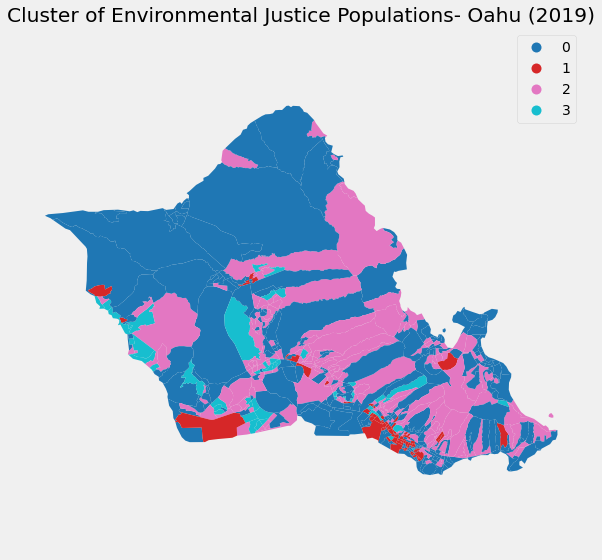

In [19]:
# Setup figure and ax
f, ax = plt.subplots(1, figsize=(9, 9))
# Plot unique values choropleth including a legend and with no boundary lines
df.plot(column='clusters', categorical=True, legend=True, linewidth=0, axes=ax)
# Remove axis
ax.set_axis_off()
# Keep axes proportionate
plt.axis('equal')
# Add title
plt.title('Cluster of Environmental Justice Populations- Oahu (2019)')
# Display the map
plt.show()

In [20]:
import folium
m = folium.Map(location=[21.461595, -157.954415], zoom_start=10, tiles = 'cartodbpositron')

#bins = list(df["pop"].quantile([0, 0.3, .6, 1]))

folium.Choropleth(
    geo_data=df,
    data=df,
    key_on='feature.id',
    columns=['geoid','clusters'],
    fill_color="YlOrRd",
    fill_opacity=0.7,
    line_opacity=0.9,
    line_color='white', 
    line_weight=0,
    highlight=False, 
    smooth_factor=1.0,
#bins=bins,
    legend_name="Population").add_to(m)

m